<a href="https://colab.research.google.com/github/akanksha-2002/AI-TOOL-FOR-DEI-IN-MEDIA/blob/main/FairlensImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing on COMPAS- Criminal history, prison time data

In [ ]:
pip install fairlens

In [ ]:
import pandas as pd

import fairlens as fl



In [ ]:
url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-raw.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,...,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0
60839,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,...,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,7,Risk of Violence,-2.75,2,Low,New,1,0
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15648 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

In [ ]:
fscorer = fl.FairnessScorer(df, "RawScore")


In [ ]:
fscorer.sensitive_attrs

['DateOfBirth',
 'Ethnic_Code_Text',
 'Language',
 'MaritalStatus',
 'Sex_Code_Text']

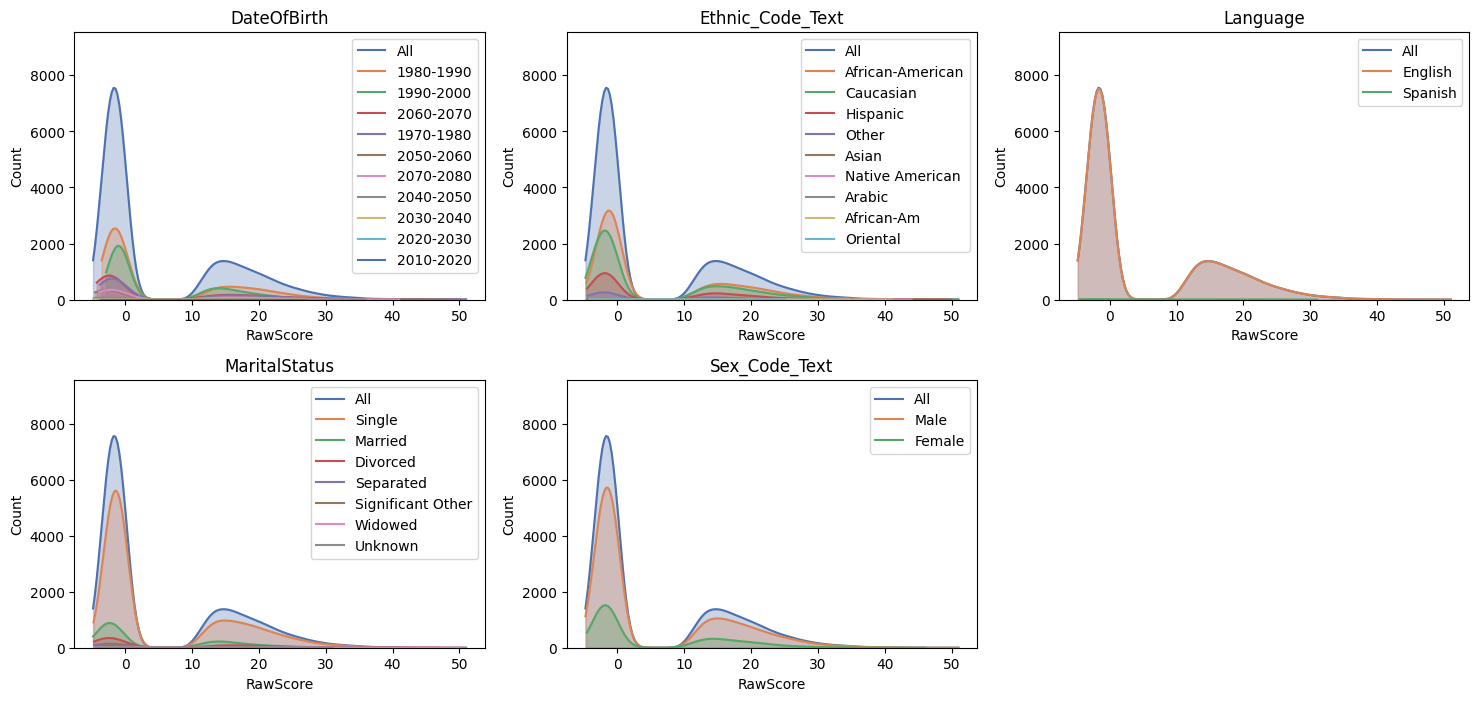

In [ ]:
fscorer.plot_distributions()

# **FAIRLENS IMPLEMENTATION FOR KAGGLE Dataset**

In [ ]:
url = 'https://raw.githubusercontent.com/akanksha-2002/AI-TOOL-FOR-DEI-IN-MEDIA/main/Dataset/DEI%20Dataset.csv'
df2 = pd.read_csv(url)

In [ ]:
df2

,Id,Name,Surname,Division,Manager,Gender,Sexual_Orientation,LGBTQ,Indigenous,Ethnicity,...,E_Neutral,E_Positive,Aug_I_Q1,Aug_I_Q2,Aug_I_Q3,Aug_I_Q4,Aug_I_Q5,I_Negative,I_Neutral,I_Positive
0,1,Deborah,Addison,IT,No,Transgender,Heterosexual,Prefer not to say,No,White,...,1,2,0,1,1,0,-2,1,2,2
1,2,Mona,Hill,Marketing,No,Male,Heterosexual,No,Yes,White,...,2,3,0,-1,1,1,0,1,2,2
2,3,Kimberly,Shelton,Finance,No,Female,Heterosexual,No,No,White,...,0,4,-2,2,2,0,2,1,1,3
3,4,Denis,Robinson,HR,No,Male,Heterosexual,No,No,White,...,1,3,0,2,1,0,1,0,2,3
4,5,Carmen,Gunn,RD,No,Male,Heterosexual,No,No,Asian,...,0,5,1,1,1,2,2,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Louise,Robertson,HR,No,Male,Heterosexual,No,Prefer not to say,White,...,0,4,0,2,1,2,1,0,1,4
9996,9997,Felicity,Gregory,Sales,No,Male,Heterosexual,No,No,White,...,1,4,2,0,-2,-2,-2,3,1,1
9997,9998,Abbey,Randall,Sales,No,Male,Heterosexual,No,No,White,...,0,3,0,1,2,0,2,0,2,3
9998,9999,Benny,Abbot,Finance,No,Prefer not to say,Heterosexual,No,No,White,...,0,3,1,2,1,1,2,0,0,5


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  10000 non-null  int64 
 1   Name                10000 non-null  object
 2   Surname             10000 non-null  object
 3   Division            10000 non-null  object
 4   Manager             10000 non-null  object
 5   Gender              10000 non-null  object
 6   Sexual_Orientation  10000 non-null  object
 7   LGBTQ               10000 non-null  object
 8   Indigenous          10000 non-null  object
 9   Ethnicity           10000 non-null  object
 10  Disability          10000 non-null  object
 11  Minority            10000 non-null  object
 12  Veteran             10000 non-null  object
 13  Date of Birth       10000 non-null  object
 14  Age                 10000 non-null  int64 
 15  Preferred Name      10000 non-null  object
 16  Nationality         100

In [ ]:
fscorer = fl.FairnessScorer(df2, "LGBTQ")
fscorer.sensitive_attrs


['Age',
 'Date of Birth',
 'Disability',
 'Ethnicity',
 'Gender',
 'Nationality',
 'Sexual_Orientation']

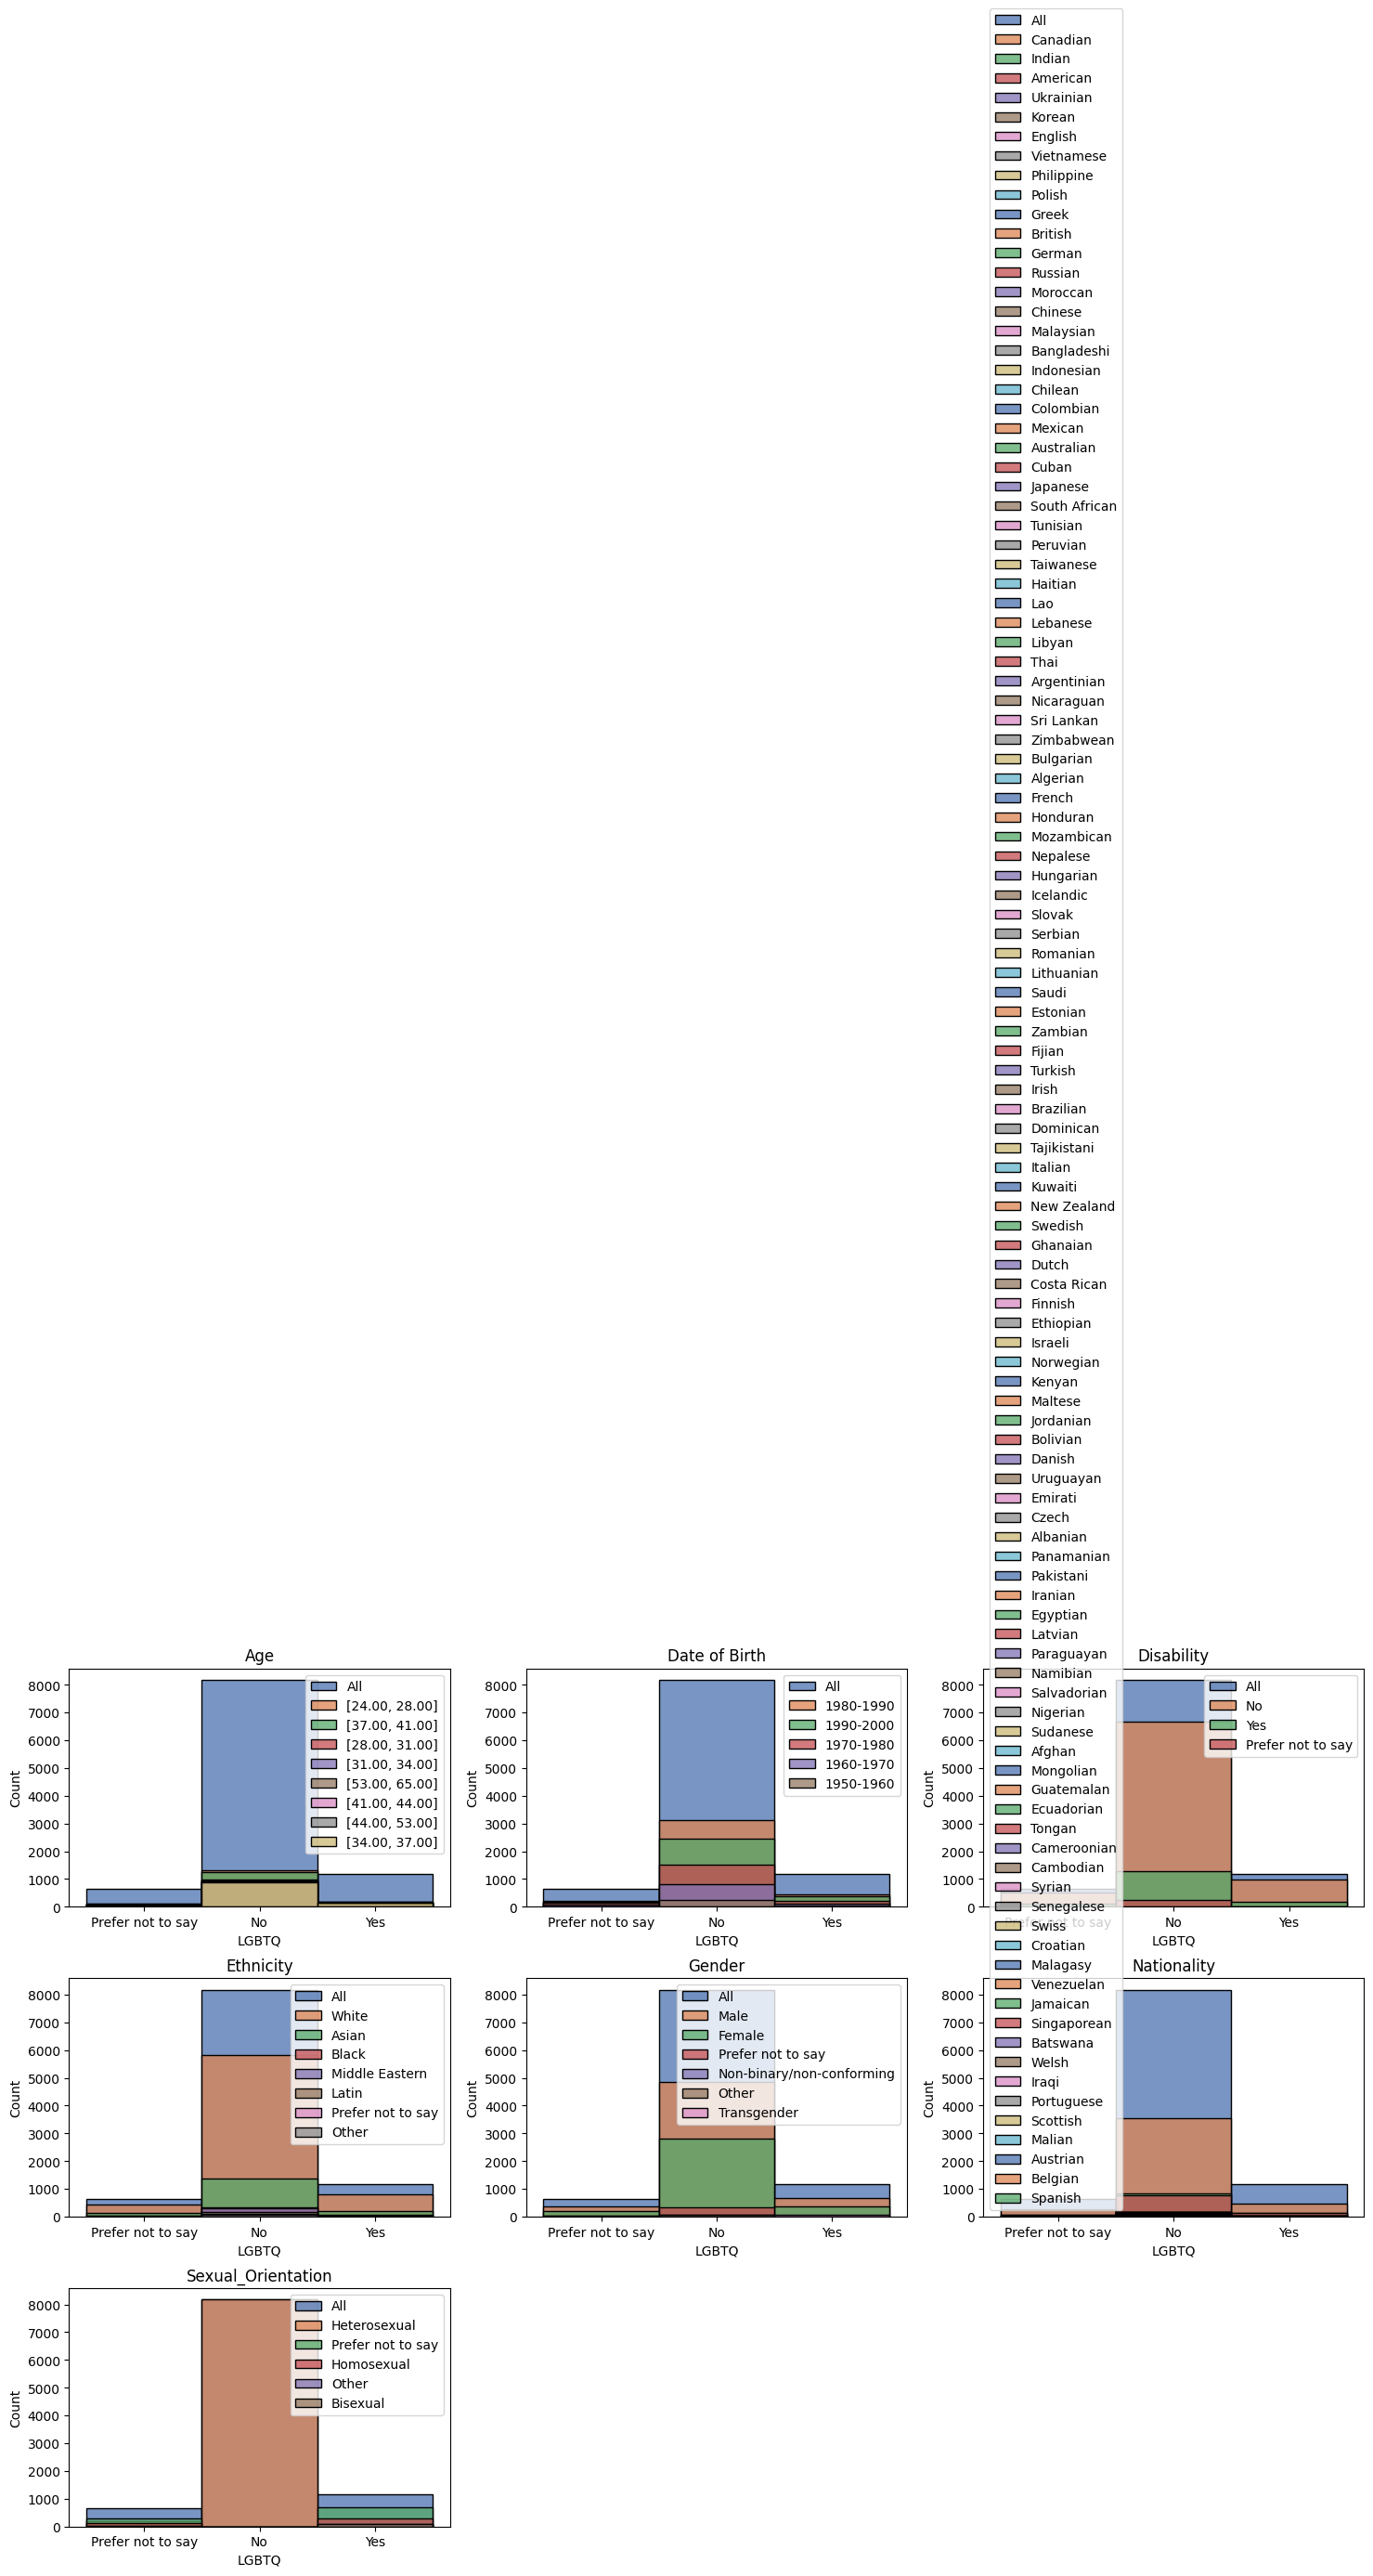

In [ ]:
fscorer.plot_distributions()